In [1]:
#import required library
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
dataset = pd.read_csv("googleplaystore.csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#checking the row and col
dataset.shape

(10841, 13)

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#statistic parameters
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
#checking the data types
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
#finding the null values are there.
dataset.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#checking the % of null value  in overall rating column

percentage = (dataset['Rating'].isnull().sum(axis=0)/10841)*100
print("Percentage of null value present :", percentage)

#note: 
# checking the no. of rows: dataset.shape[0]
# checking the no. of columns: dataset.shape[1]

Percentage of null value present : 13.596531685268886


In [9]:
#drop the null values, if null value are less then 30% from overall value.
dataset.dropna(inplace=True)

#checking the null value present or not
#dataset.isnull().sum(axis=0)

#filling the null value to its rating mean values.
#dataset = dataset.fillna(np.mean(dataset['Rating']))

In [10]:
dataset.shape

(9360, 13)

In [11]:
#checking the col names
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
#rename the columns name
dataset.rename(columns={"Current Ver": "Current_version", "Android Ver":"Android_version"}, inplace=True)
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current_version',
       'Android_version'],
      dtype='object')

In [13]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current_version,Android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


### Handling the variables

### 1. clean the Price column.
###### Remove $ symbol from starting in Price column and keep all letters after dollor symbol

In [14]:
#checking the price col with diff value count
dataset.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

In [15]:
#loop for cleaning the Price col
dataset['Price'] = dataset['Price'].apply(lambda x: 0 if x=='0' else float(x[1:]))
dataset.Price.value_counts()

Price
0.00    8715
2.99     114
0.99     106
4.99      70
1.99      59
        ... 
2.95       1
2.90       1
1.97       1
2.56       1
1.20       1
Name: count, Length: 73, dtype: int64

#### 2. convert the Reviews in to numeric

In [16]:
dataset.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price              float64
Content_Rating      object
Genres              object
Last Updated        object
Current_version     object
Android_version     object
dtype: object

In [17]:
dataset.Reviews = dataset.Reviews.astype('int32')

In [18]:
dataset.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size                object
Installs            object
Type                object
Price              float64
Content_Rating      object
Genres              object
Last Updated        object
Current_version     object
Android_version     object
dtype: object

#### 3. handling the Size column

In [19]:
#creating the funtion to remove M and K from Size col
def change_size(size):
    if "M" in size:
        x= size[:-1]
        x=float(x)*1000
        return x
    elif "K" in size:
        x = size[: -1]
        return (float(x))
    else:
        return None

In [20]:
dataset['Size'] = dataset['Size'].apply(change_size)

In [21]:
dataset['Size'].describe()

count      7466.000000
mean      23746.316635
std       23467.457006
min        1000.000000
25%        5900.000000
50%       15000.000000
75%       34000.000000
max      100000.000000
Name: Size, dtype: float64

##### 4.handling Install column

In [22]:
dataset.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [23]:
def clean_install(value):
    return int(value.replace(",","").replace("+",""))

In [24]:
dataset.Installs = dataset.Installs.apply(clean_install)

In [25]:
dataset.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content_Rating      object
Genres              object
Last Updated        object
Current_version     object
Android_version     object
dtype: object

##### 5. checking the rating column

In [26]:
dataset["Rating"].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### Observation:

In [27]:
#checking the review should not greater than install
dataset[dataset['Reviews'] > dataset['Installs']].index

Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [28]:
#droping the colum which are greter than install

#dataset.drop(index=[2454, 4663, 5917, 6700, 7402, 8591, 10697])
dataset = dataset[dataset['Reviews'] <= dataset['Installs']].copy()
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current_version,Android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature_17+,Books_&_Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
dataset.shape

(9353, 13)

### for type == Free, the price should not be > 0

In [30]:
pd.crosstab(columns=dataset.Type, index=dataset.Price)

Type,Free,Paid
Price,,
0.00,8711,0
0.99,0,105
1.00,0,2
1.20,0,1
1.29,0,1
...,...,...
299.99,0,1
379.99,0,1
389.99,0,1


In [31]:
len(dataset[(dataset['Type'] == "Free") & (dataset.Price >0)])

0

## EDA:

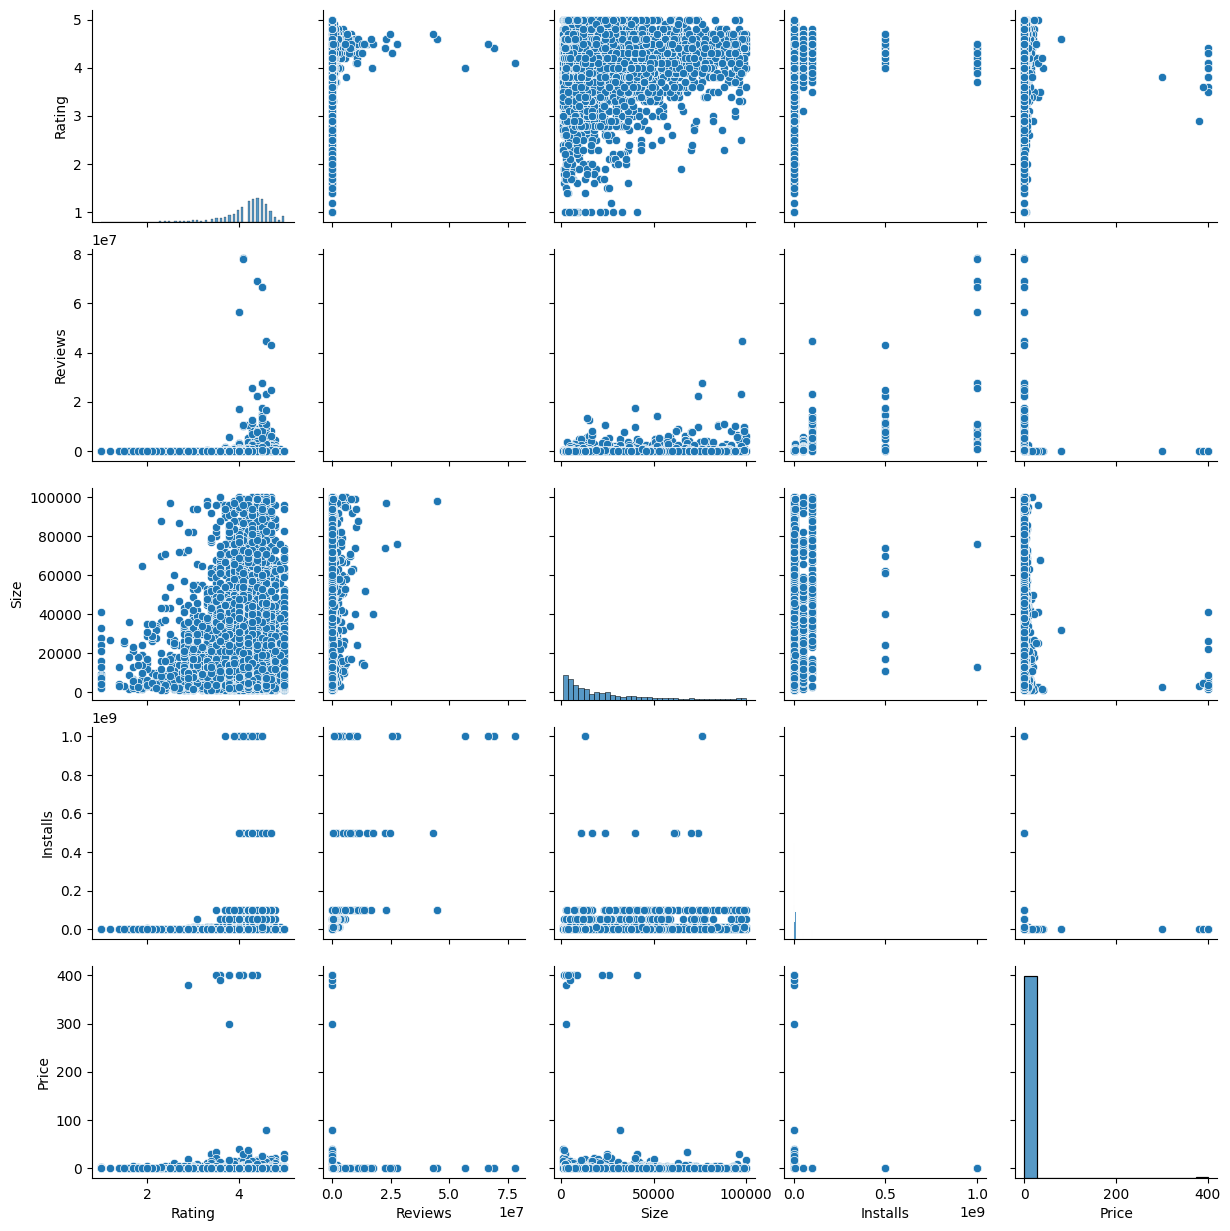

In [32]:
sns.pairplot(data=dataset)

### Outlier Treatment

<Axes: ylabel='Price'>

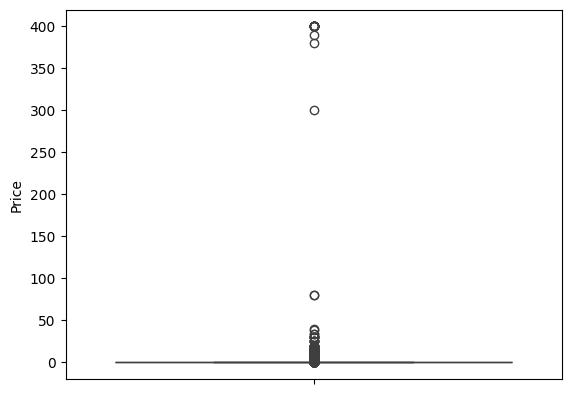

In [33]:
sns.boxplot(data=dataset["Price"])

In [34]:
#droping the row which have more than 200
dataset =  dataset[dataset.Price <= 200].copy()
dataset.shape

(9338, 13)

<Axes: ylabel='Reviews'>

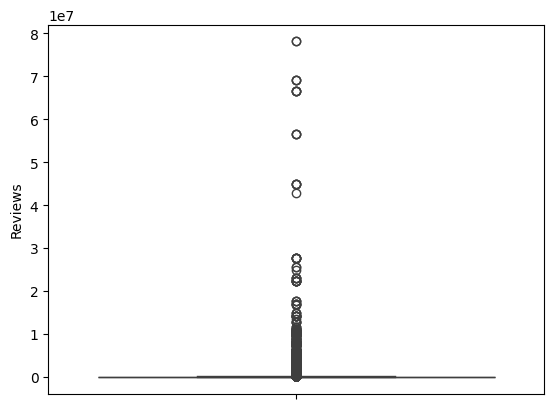

In [35]:
sns.boxplot(data=dataset["Reviews"])

In [36]:
dataset = dataset[dataset.Reviews <=2000000].copy()
dataset.shape

(8885, 13)

<Axes: ylabel='Installs'>

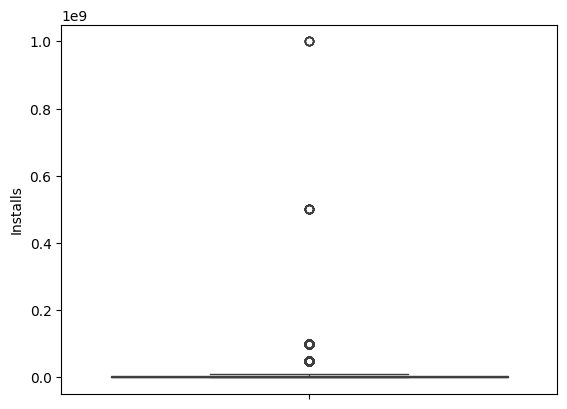

In [37]:
sns.boxplot(data=dataset["Installs"])

In [38]:
dataset = dataset[dataset.Installs < 100000000].copy()
dataset.shape

(8743, 13)

## Bi_varient Analysis

#### Rating VS Price

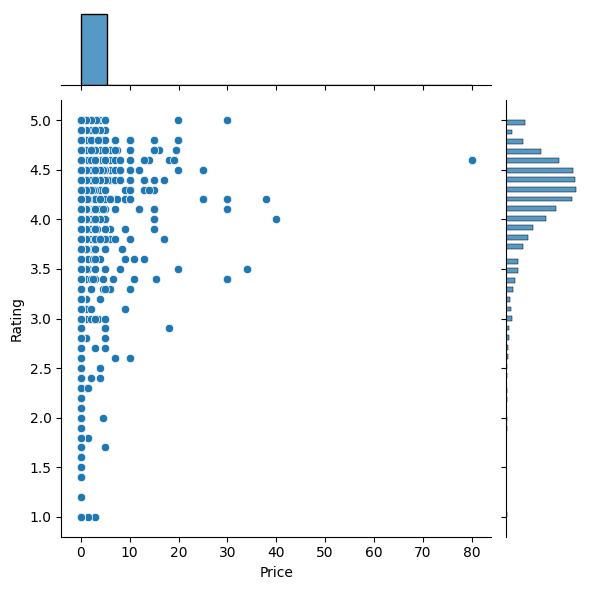

In [39]:
sns.jointplot(dataset, x="Price", y="Rating")

#### Rating vs Size

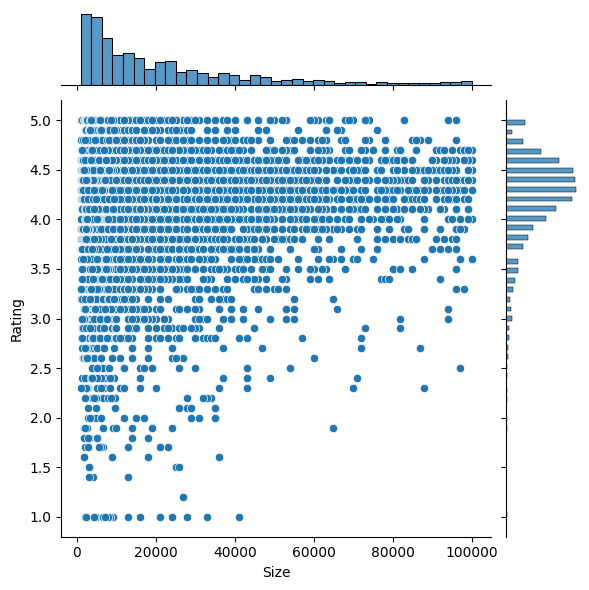

In [40]:
sns.jointplot(dataset, x="Size", y="Rating")

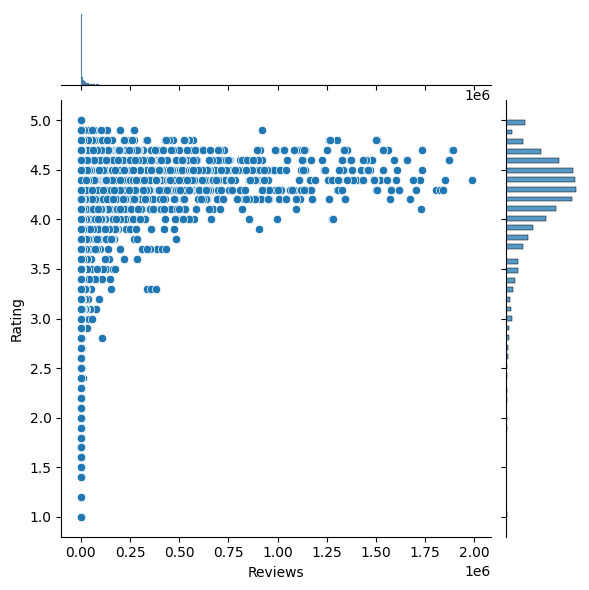

In [41]:
sns.jointplot(dataset, x="Reviews", y="Rating")

#### Rating VS content_rating

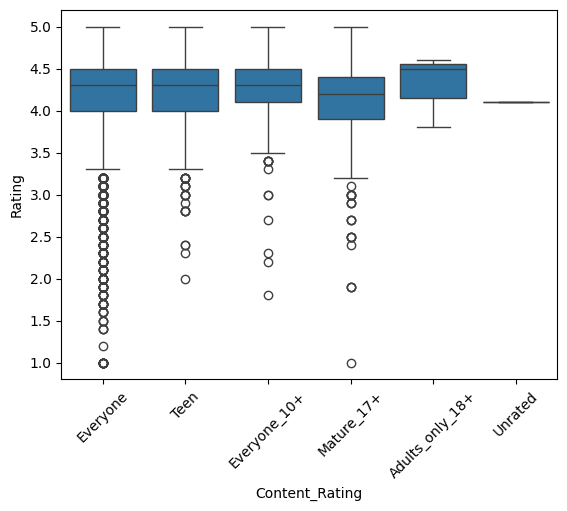

In [42]:
sns.boxplot(dataset, x=dataset.Content_Rating, y=dataset['Rating'])
plt.xticks(rotation=45)
plt.show()

#### Rating vs category

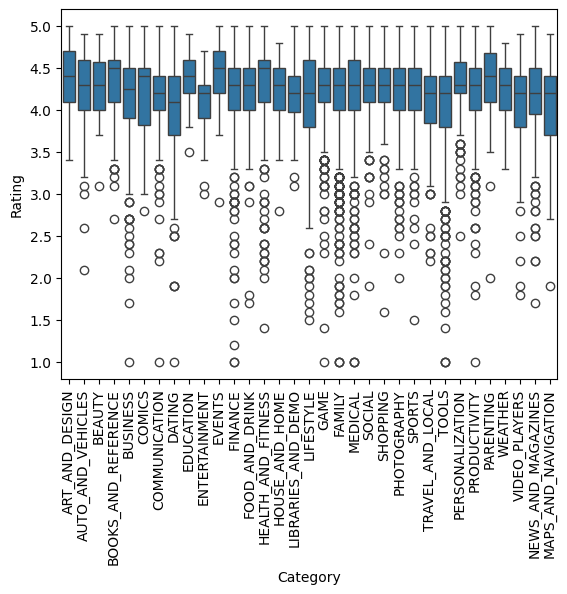

In [43]:
sns.boxplot(dataset, x=dataset['Category'], y=dataset['Rating'])
plt.xticks(rotation=90)
plt.show()

In [44]:
dataset.shape

(8743, 13)

<Axes: >

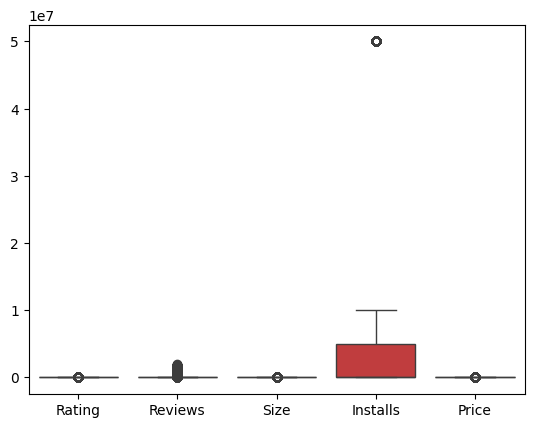

In [45]:
sns.boxplot(dataset)

In [46]:
#Saving the clean dataset in csv format
dataset.to_csv("Clean_google_playstore.csv")

In [47]:
#creating the copy of new dataset.
dataset1 = dataset.copy()

<Axes: xlabel='Reviews', ylabel='Density'>

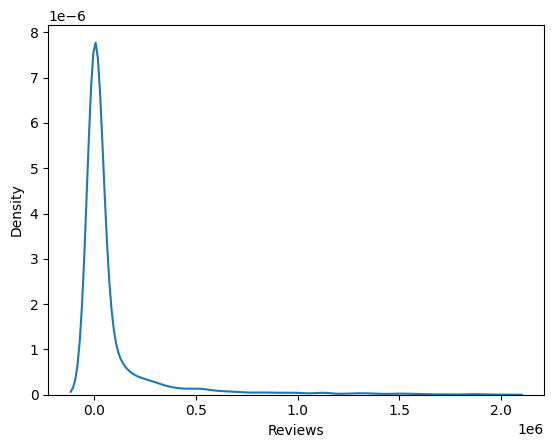

In [48]:
sns.kdeplot(dataset1.Reviews)

<Axes: xlabel='Installs', ylabel='Density'>

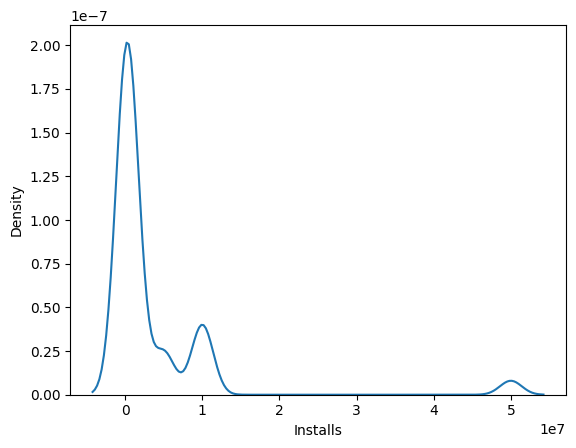

In [49]:
sns.kdeplot(dataset1.Installs)

<Axes: xlabel='Installs', ylabel='Density'>

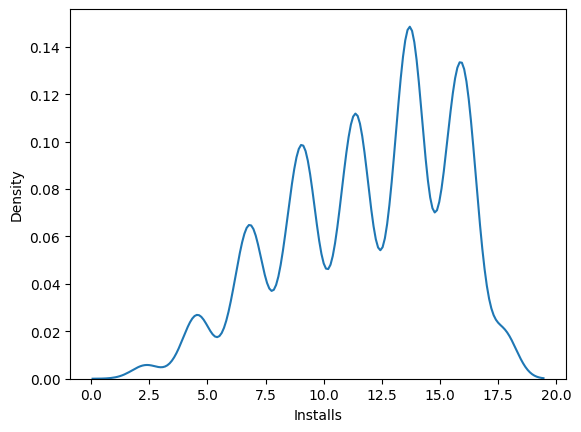

In [50]:
dataset1.Installs = dataset1.Installs.apply(np.log1p)
sns.kdeplot(dataset1.Installs)

<Axes: xlabel='Reviews', ylabel='Density'>

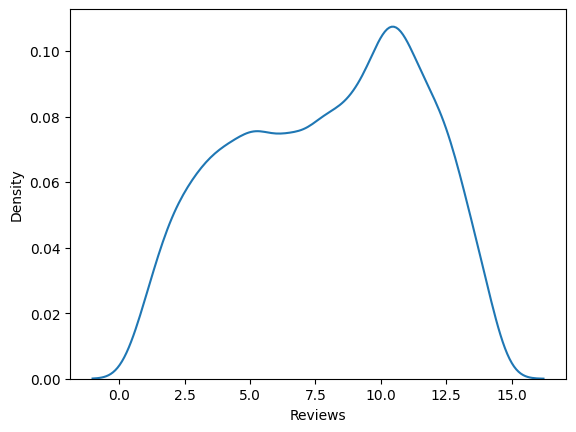

In [51]:
dataset1.Reviews = dataset1.Reviews.apply(np.log1p)
sns.kdeplot(dataset1.Reviews)

In [52]:
dataset.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current_version,Android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art_&_Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art_&_Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art_&_Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art_&_Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art_&_Design_Creativity,"July 3, 2018",2.8,4.0.3 and up


In [53]:
dataset["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [54]:
import warnings

In [55]:
warnings.filterwarnings('ignore')

In [56]:
dataset.isnull().sum(axis=0)

App                   0
Category              0
Rating                0
Reviews               0
Size               1576
Installs              0
Type                  0
Price                 0
Content_Rating        0
Genres                0
Last Updated          0
Current_version       0
Android_version       0
dtype: int64

In [57]:
dataset1.shape

(8743, 13)

In [58]:
dataset1.shape

(8743, 13)

In [59]:
dataset1.isnull().sum(axis=0)

App                   0
Category              0
Rating                0
Reviews               0
Size               1576
Installs              0
Type                  0
Price                 0
Content_Rating        0
Genres                0
Last Updated          0
Current_version       0
Android_version       0
dtype: int64

In [60]:
dataset1.dropna(inplace=True)

In [61]:
dataset1.isnull().sum(axis=0)

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last Updated       0
Current_version    0
Android_version    0
dtype: int64

In [62]:
dataset1.head(0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current_version,Android_version


In [63]:
dataset1.drop(columns=["App", "Last Updated", "Current_version", "Android_version"], inplace=True)
dataset1.shape

(7167, 9)

In [64]:
dataset1.head(0)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres


In [65]:
#creating the dummies variables 
dataset2 = pd.get_dummies(dataset1, drop_first=True, dtype=int)
dataset2.shape

(7167, 154)

#### Selecting the target variable and input features.

In [66]:
#spliting the target and input feature from dataset1
x = dataset2.drop(columns=["Rating"])
x

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Strategy_Education,Genres_Tools,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281389,25000.0,17.727534,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.782192,2300.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y = dataset2["Rating"]
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10830    3.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7167, dtype: float64

In [68]:
#loading the train and test library
from sklearn.model_selection import train_test_split

In [69]:
#splitting the dataset in to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, train_size=0.7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5016, 153), (2151, 153), (5016,), (2151,))

In [70]:
x_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Strategy_Education,Genres_Tools,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
9480,3.89182,4100.0,6.908755,1.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### loading the linear model for linear regression.

In [71]:
#loding the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
lr

LinearRegression()

In [73]:
#fitting the model
lr.fit(x_train, y_train)
lr

LinearRegression()

In [74]:
#predicting the model
y_predict_test = lr.predict(x_test)


In [75]:
compared_Predicted_valur = pd.DataFrame(y_predict_test, columns=['Predicted'])


In [76]:
compared_Predicted_valur.shape

(2151, 1)

In [77]:
actual = pd.DataFrame(y_test)


,Rating
7844,4.3
5782,4.2
7725,4.5
6283,4.3
1492,3.9
...,...
719,4.4
2683,4.3
556,4.4
4341,4.3


In [78]:
actual.reset_index(inplace=True, drop=True)

,Rating
0,4.3
1,4.2
2,4.5
3,4.3
4,3.9
...,...
2146,4.4
2147,4.3
2148,4.4
2149,4.3


In [82]:
compared_Predicted_valur_ = pd.concat([compared_Predicted_valur, actual], axis=1)

In [83]:
compared_Predicted_valur_

,Predicted,Rating
0,3.882744,4.3
1,4.032270,4.2
2,4.222174,4.5
3,3.932434,4.3
4,4.222769,3.9
...,...,...
2146,3.832535,4.4
2147,4.306697,4.3
2148,4.450971,4.4
2149,4.300612,4.3


In [91]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [94]:
print(f"r2_score: {r2_score(y_test, y_predict_test)}")

r2_score: 0.144763988020165


In [96]:
print("mean absolute error: ",  mean_absolute_error(y_test, y_predict_test))

mean absolute error:  0.3541846778980626


In [97]:
print("mean square error:", mean_squared_error(y_test, y_predict_test))

mean square error: 0.2542775375592479


In [98]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict_test)))

RMSE: 0.5042593951125234


In [114]:
#loading the linear model as Ridge, Lasso and elasticnet
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [120]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg

Ridge(alpha=0.1)

In [121]:
#fitting the model using x_train, y_train.
ridge_reg.fit(x_train, y_train)
#predicting the model
y_predict_ridge = ridge_reg.predict(x_test)


In [122]:
compare_ridge_reg = pd.DataFrame(y_predict_ridge, columns=["ridge_predict"])

In [123]:
compare_ridge_reg

,ridge_predict
0,3.890338
1,4.030929
2,4.221936
3,3.932488
4,4.222655
...,...
2146,3.818973
2147,4.305183
2148,4.450678
2149,4.299171


In [124]:
print(f"r2_score: {r2_score(y_test, y_predict_ridge)}")
print("mean absolute error: ",  mean_absolute_error(y_test, y_predict_ridge))
print("mean square error:", mean_squared_error(y_test, y_predict_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict_ridge)))

r2_score: 0.14504358404169548
mean absolute error:  0.35405251392304654
mean square error: 0.254194408473393
RMSE: 0.504176961466302
